In [54]:
#import modules
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd

In [55]:
#making dataframe using 2 llists

var1 =[1,1,5,4,4,8,8,2]
var2 =[5,2,8,8,9,3,2,1]

d = {'Var1':var1,'Var2':var2}
df= pd.DataFrame(d)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Var1    8 non-null      int64
 1   Var2    8 non-null      int64
dtypes: int64(2)
memory usage: 256.0 bytes


In [56]:
#create dataset
# X,y = make_blobs(
#     n_samples=10, n_features=2,
#     centers=3, cluster_std=0.5,
#     shuffle=True, random_state=0
# )
# print(X)
# print (y)

X = df.iloc[:,[0,1]]
# y = df.iloc[:,[1]]
print(X)


   Var1  Var2
0     1     5
1     1     2
2     5     8
3     4     8
4     4     9
5     8     3
6     8     2
7     2     1


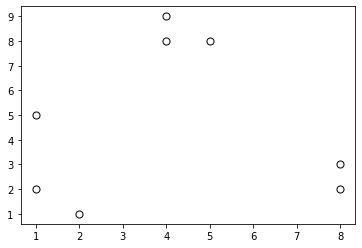

In [57]:
#plotting
plt.scatter(
  #  df.iloc[:, 0], df.iloc[:, 1],
   var1,var2,
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [58]:
# train K-Means clustering
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
print(y_km)


[2 2 1 1 1 0 0 2]


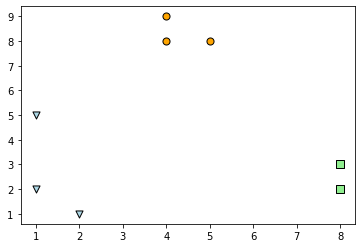

In [60]:
# plot the 3 clusters
plt.scatter(
    X.iloc[5:7,0], X.iloc[5:7,1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='C1'
)

plt.scatter(
    X.iloc[2:5,0], X.iloc[2:5,1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='C2'
)

plt.scatter(
    X.iloc[[0,1,7],0], X.iloc[[0,1,7],1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='C3'
)


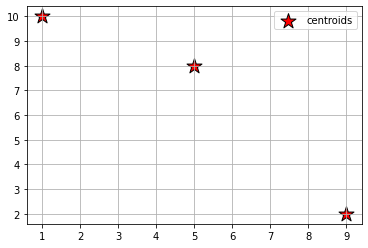

In [61]:
# plot the centroids

# #bikin matrices and plot ntr
# import numpy as np
# a = np.column_stack(([1, 5, 9], [10, 8, 2]))
# print(a)

# plt.scatter(
#    a[0],a[1],
#     s=250, marker='*',
#     c='red', edgecolor='black',
#     label='centroids'
# )
# using dataframe
r1 =[1,5,9]
r2 =[10,8,2]

c = {'R1':r1,'R2':r2}
z = pd.DataFrame(c)

plt.scatter(
    r1,r2,
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [62]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

print(distortions)

[126.375, 62.75, 11.166666666666668, 2.8333333333333335, 1.8333333333333335, 1.0, 0.5]


In [63]:
#finding the elbow using kneed locator
#i dont know why import modules failed

from kneed import KneeLocator
kl = KneeLocator(range(1, 8), distortions, curve="convex", direction="decreasing")
kl.elbow

ModuleNotFoundError: ignored

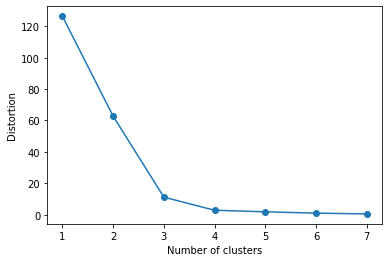

In [64]:
# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# #EXCERCISE 2
# #making dataframe using 2 llists

# #sorry i changed the v to x because i made it inthe same page
# xar1 =[1.0,1.5,3.0,5.0,3.5,4.5,3.5]
# xar2 =[1.0,2.0,4.0,7.0,5.0,5.0,4.5]

# d = {'Xar1':xar1,'Xar2':xar2}
# df= pd.DataFrame(d)
# df.head()

,Xar1,Xar2
0,1.0,1.0
1,1.5,2.0
2,3.0,4.0
3,5.0,7.0
4,3.5,5.0
